# Challenge Question

## Reading in Data

In [ ]:
import pandas as pd
import numpy as np

# Read data
XYtr = pd.read_csv('data/XYtr.csv')

XYtr1 = XYtr.copy() # from stackoverflow

# convert to datetime
XYtr1['cdate'] = pd.to_datetime(XYtr1['cdate'])

# checking for duplicate ids
# inspired by https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicateRowsDF = XYtr1[XYtr1.duplicated(['id'])]

duplicateRowsDF

XYtr2 = XYtr1[['cdate', 'total']].copy()

In [2]:
# data downloaded from https://ethereumprice.org/history/?start=2019-04-26&end=2021-09-29&currency=USD

# package to convert datetime
import datetime

# read in Ethereum data
eth = pd.read_csv('data/ethprice.csv')

# copy dataframe to another
eth1 = eth.copy()

# convert timestamp to actual date instead of integer values
eth1['timestamp'] = pd.to_datetime(eth1['timestamp'], unit = 's')

# sort dataframe so first row is the earliest date
eth1 = eth1.sort_values(by = ['timestamp'], ignore_index = True)

# combine eth price to nft price based on date
df = XYtr2.merge(eth1, left_on = 'cdate', right_on = 'timestamp')


## Visualizations

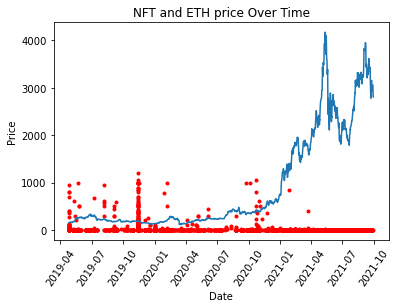

In [36]:
import matplotlib.pyplot as plt

# visualization of the NFT prices

plt.plot(df['cdate'],df['total'],"r.")
plt.plot(eth1['timestamp'],eth1['open'])
plt.title('NFT and ETH price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 55)
plt.show()

In [23]:
# Normalization of ETH price

from sklearn import preprocessing

# reshape data in format for normalizing
x = np.array(eth1['open']).reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

normdf = pd.DataFrame(x_scaled)
normdf1 = normdf.rename(columns={0:'normETH'})

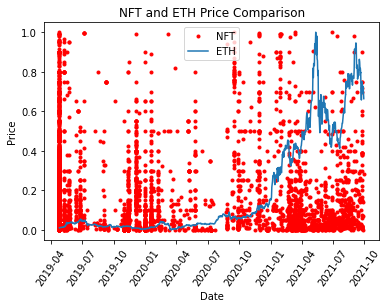

In [37]:
# Plotting NFT prices less than 1 with normalized ETH prices

plotdata = XYtr2[XYtr2['total'] < 1]

plt.plot(plotdata['cdate'],plotdata['total'],"r.")
plt.plot(eth1['timestamp'],normdf1)
plt.title('NFT and ETH Price Comparison')
plt.xticks(rotation = 55)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['NFT','ETH'])
plt.show()

In [11]:
# Normalization of ETH prices

x = np.array(df['open']).reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

normdf = pd.DataFrame(x_scaled)
normdf = normdf.rename(columns={0:'normETH'})

mdldf = pd.concat([df,normdf],axis = 1)

In [14]:
# Summary Statistics of NFT prices

XYtr2.describe()

,total
count,6914.000000
mean,9.658152
std,73.846736
min,0.000000
25%,0.029338
50%,0.120000
75%,0.450000
max,1195.000000


## Linear Regression


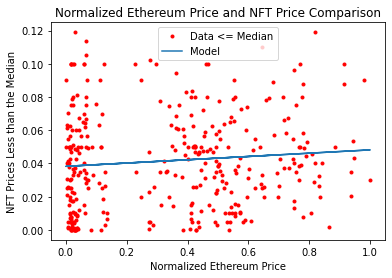

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# gathering only date, nft price, and normalized eth price
mdldf3 = mdldf[['cdate','total','normETH']].copy()

# filter data to nft prices less than the median
mdldf3 = mdldf3[mdldf3['total']<=0.12]

# group the data by the mean price of each day
mdldf3 = mdldf3.groupby('cdate').mean()

# formatting x and y for linear regression
X = np.stack([mdldf3['normETH']], axis = 1)
y = np.stack([mdldf3['total']], axis = 1)

# splitting data in training and testing set
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

# fitting the model
lin_reg = LinearRegression(fit_intercept = True)
lin_reg.fit(X_train, y_train)

# score of the model
# print(lin_reg.score(X_valid,y_valid))

# plotting the regression line along with the nft and eth prices
plt.plot(mdldf3['normETH'],mdldf3['total'],"r.")
plt.plot(X,lin_reg.predict(X))
plt.xlabel('Normalized Ethereum Price')
plt.ylabel('NFT Prices Less than the Median')
plt.title('Normalized Ethereum Price and NFT Price Comparison')
plt.legend(['Data <= Median','Model'])
plt.show()

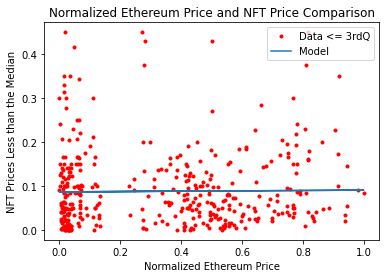

In [39]:
# Same process as above but with nft prices less than the third quartile

mdldf3 = mdldf[['cdate','total','normETH']].copy()
mdldf3 = mdldf3[mdldf3['total']<=0.45]
mdldf3 = mdldf3.groupby('cdate').mean()

X = np.stack([mdldf3['normETH']], axis = 1)
y = np.stack([mdldf3['total']], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_train, y_train)
# print(lin_reg.score(X_valid,y_valid))

plt.plot(mdldf3['normETH'],mdldf3['total'],"r.")
plt.plot(X,lin_reg.predict(X))
plt.xlabel('Normalized Ethereum Price')
plt.ylabel('NFT Prices Less than the Median')
plt.title('Normalized Ethereum Price and NFT Price Comparison')
plt.legend(['Data <= 3rdQ','Model'])
plt.show()

0.074983631904316


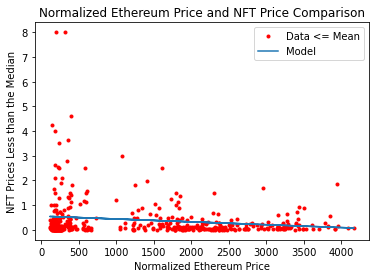

In [40]:
# Same process as above but with nft prices less than the mean

mdldf3 = mdldf[['cdate','total','open']].copy()
mdldf3 = mdldf3[mdldf3['total']<=9.6]
mdldf3 = mdldf3.groupby('cdate').mean()

X = np.stack([mdldf3['open']], axis = 1)
y = np.stack([mdldf3['total']], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_valid,y_valid))

plt.plot(mdldf3['open'],mdldf3['total'],"r.")
plt.plot(X,lin_reg.predict(X))
plt.xlabel('Normalized Ethereum Price')
plt.ylabel('NFT Prices Less than the Median')
plt.title('Normalized Ethereum Price and NFT Price Comparison')
plt.legend(['Data <= Mean','Model'])
plt.show()

0.04236359051028027


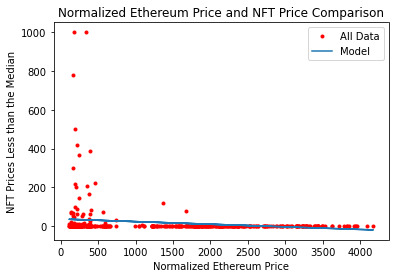

In [41]:
# Same process as above but with all the nft prices

mdldf3 = mdldf[['cdate','total','open']].copy()
# mdldf3 = mdldf3[mdldf3['total']<0.12]
mdldf3 = mdldf3.groupby('cdate').mean()

X = np.stack([mdldf3['open']], axis = 1)
y = np.stack([mdldf3['total']], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

lin_reg = LinearRegression(fit_intercept = True)

lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_valid,y_valid))

plt.plot(mdldf3['open'],mdldf3['total'],"r.")
plt.plot(X,lin_reg.predict(X))
plt.xlabel('Normalized Ethereum Price')
plt.ylabel('NFT Prices Less than the Median')
plt.title('Normalized Ethereum Price and NFT Price Comparison')
plt.legend(['All Data','Model'])
plt.show()

From the above plots, we ran a linear regression model to see the correlation between Ethereum price and the NFT sale price. We normalized the Ethereum price to make the plots easier to interpret. There seems to be a slightly positive correlation between Ethereums price and the NFT sale price when comparing only the NFT prices that are less than the median. We also made models based on the all NFT sale prices and prices less than the third quartile and mean. As we include more data, with prices less than the median having the least amount, the correlation seems to decrease. 